In [2]:
import vectorbt as vbt
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

/Users/jin/anaconda3/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
# Set year of BETA
year = 5
start = datetime.now() - timedelta(days=365*year)
end = datetime.now()

df_market = vbt.YFData.download('0050.TW', start=start, end=end, interval='1mo').get()
df_target = vbt.YFData.download('2330.TW', start=start, end=end, interval='1mo').get()

In [4]:
datasets = [df_market, df_target]

In [5]:
for i in datasets:
    i['cumu'] = i.Close / i.Close.iloc[0]
    i['daily_return'] = i.Close.pct_change()

In [6]:
lr = stats.linregress(df_market.daily_return.iloc[1:], df_target.daily_return.iloc[1:])

In [7]:
print('BETA: {}'.format(lr[0]))

BETA: 1.408990590892471


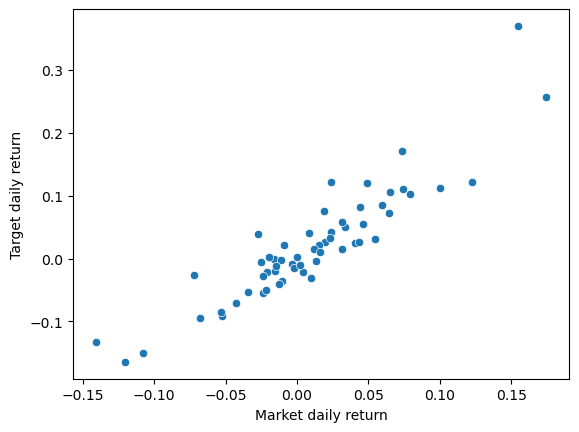

In [8]:
sns.scatterplot(x=df_market.daily_return.iloc[1:], y=df_target.daily_return.iloc[1:])
plt.xlabel('Market daily return')
plt.ylabel('Target daily return')
plt.show()

In [9]:
# ROI
df_market.Close.iloc[len(df_market)-1] / df_market.Close.iloc[0]

1.6247581565652045

In [10]:
# IRR
(df_market.Close.iloc[len(df_market)-1] / df_market.Close.iloc[0])**(1/year)

1.1019394851824351